In [1]:
accuracies = []

In [2]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder
import pickle 


# Importing the dataset from the sklearn library into a local variable called dataset
df = pd.read_excel("train.xlsx")

# Extract the hyperspectral data (excluding the last column) and labels (last column)
hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
Y = encoded_labels

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively 
# x_test, y_test are testing data and labels respectively 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=4)

# Making the SVM Classifer
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)
accuracies.append(accuracy)
print(accuracies)

[0.9976019184652278]


In [3]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import pickle 

# Importing the dataset from the sklearn library into a local variable called dataset
df = pd.read_excel("train.xlsx")

# Extract the hyperspectral data (excluding the last column) and labels (last column)
hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
Y = encoded_labels

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively 
# x_test, y_test are testing data and labels respectively 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  

classifier = RandomForestClassifier(n_estimators = 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

#Predicting the test set result  
y_pred = classifier.predict(x_test)   

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)
accuracies.append(accuracy)
print(accuracies)

[0.9976019184652278, 0.7002398081534772]


In [4]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle 


# Importing the dataset from the sklearn library into a local variable called dataset
df = pd.read_excel("train.xlsx")

# Extract the hyperspectral data (excluding the last column) and labels (last column)
hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
Y = encoded_labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively 
# x_test, y_test are testing data and labels respectively 
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=4)

# Making the logistic regression model
logistic_model = LogisticRegression(max_iter = 1000)

# Training the model on the training data and labels
logistic_model.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = logistic_model.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)
accuracies.append(accuracy)
print(accuracies)

[0.9976019184652278, 0.7002398081534772, 0.8705035971223022]


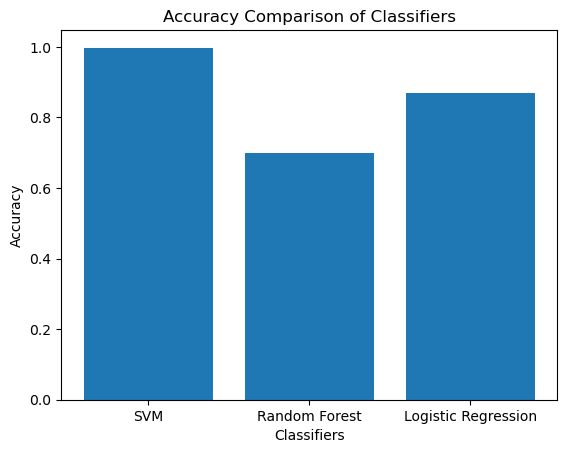

In [5]:
import matplotlib.pyplot as plt
classifiers = ['SVM', 'Random Forest', 'Logistic Regression']
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.show()